The dispatch function in Django class-based views is used to handle incoming HTTP requests and determine the appropriate method (e.g., get, post, etc.) to handle the request based on the HTTP method used. It acts as a middleman between incoming requests and the corresponding methods that produce the HTTP responses.

Here’s a step-by-step explanation of the dispatch function:

The dispatch function takes in the following arguments:
request: The incoming HTTP request.
*args and **kwargs: Additional positional and keyword arguments to be passed to the appropriate method.
It then checks the HTTP method used in the request. Django supports several HTTP methods, such as GET, POST, PUT, DELETE, etc.
Based on the HTTP method, it calls the appropriate method (e.g., get, post, etc.) and passes along the args and kwargs received.
The called method produces the HTTP response, which is then returned by the dispatch function.
Here’s an example of a simple implementation of the dispatch function:

```python
from django.http import HttpResponse

class MyView(View):
    def get(self, request, *args, **kwargs):
        return HttpResponse("This is a GET request.")

    def post(self, request, *args, **kwargs):
        return HttpResponse("This is a POST request.")

    def dispatch(self, request, *args, **kwargs):
        if request.method == 'GET':
            return self.get(*args, **kwargs)
        elif request.method == 'POST':
            return self.post(*args, **kwargs)
        else:
            return HttpResponse(f"This view doesn't support the {request.method} method.")
```

In this example, the dispatch function checks the HTTP method, and if it’s a GET request, it calls the get method; if it’s a POST request, it calls the post method. If the HTTP method is not GET or POST, it returns a response indicating that the view doesn’t support that method.

You can customize the dispatch function to handle other HTTP methods or modify the arguments passed to the methods. This flexibility allows you to create complex views that can handle various types of requests.


<br>
<font size=5>values method in django ORM</font>
<br><br>
The values() method in Django’s ORM is used to retrieve data from a database and return each object as a Python dictionary. The keys in the dictionary are the names of the model’s fields, and the values are the corresponding values from the object. This method is useful when you need to work with a subset of the fields in a model, or when you want to create a dictionary representation of the object.

Here’s a step-by-step guide on how to use the values() method:

Import the values() method from Django’s ORM:
```python
from django.db.models import values

# Assuming you have a model named 'ModelName'
data = ModelName.objects.values()

The data variable now contains a QuerySet of dictionaries, where each dictionary represents an object from the database. The keys in each dictionary are the field names, and the values are the corresponding field values.
You can use the retrieved data in your views, templates, or anywhere else in your application.
Here’s an example of using values() in a Django view:

from django.shortcuts import render
from .models import MyModel

def my_view(request):
    data = MyModel.objects.values()
    context = {
        'data': data,
    }
    return render(request, 'my_template.html', context)

In the template, you can then access the data like this:

{% for item in data %}
    <p>{{ item.field_name }}</p>
{% endfor %}
```

<br>
<br>
The values_list() method is similar to values(), but it returns a list of tuples instead of a list of dictionaries. Each tuple contains the values of the specified fields. This method can be more efficient when you only need a few fields from a model.



# Celery 

Django Celery is a combination of two powerful tools, Django and Celery, used for creating asynchronous tasks in a web application. Celery is a distributed task queue that helps manage and execute background tasks in a distributed environment. It works by sending messages between Django applications and worker processes through a message broker, such as RabbitMQ or Redis.
<br><br>

Imagine your Django website is like a busy restaurant. When a customer (user) places an order (makes a request to your website), the waiter (Django) takes the order and delivers it to the kitchen (your server).
Sometimes, the order requires something time-consuming like cooking a steak or baking a cake. While waiting for that steak or cake to be ready, the waiter doesn't just stand there staring at the kitchen. They can take other orders, serve drinks, or attend to other customers.
In the same way, Celery acts like an assistant to Django. When your website receives a request, Celery can take on any time-consuming tasks (like sending emails or processing large files) and handle them in the background, allowing Django to keep serving other requests quickly.
So, Celery helps your Django website stay responsive and handle multiple requests efficiently by handling time-consuming tasks separately in the background.
<br><br><br>

In the provided project, the use of Celery offers several advantages:

1. **Asynchronous Task Execution**: Tasks like checking story expiration dates and deleting expired stories involve database operations that can be time-consuming. By using Celery, these tasks can be executed asynchronously in the background without blocking the main execution flow of the Django application. This ensures that the application remains responsive to user requests even when performing potentially lengthy operations.

2. **Improved Performance**: Offloading tasks to Celery helps improve the overall performance and scalability of the Django application. By separating time-consuming tasks from the web server process, Celery allows the server to handle more concurrent requests without slowing down.

3. **Concurrency and Scalability**: Celery allows you to run multiple worker processes concurrently, enabling parallel execution of tasks. This means you can scale up the number of Celery workers to handle increased workload or spikes in traffic, ensuring that tasks are processed efficiently even during peak times.

4. **Scheduled Task Execution**: Celery supports scheduling tasks to run at specific intervals. In this project, you might want to schedule the task to check story expiration dates to run periodically (e.g., every hour). Celery's scheduling feature allows you to automate such tasks without manual intervention.

5. **Fault Tolerance and Reliability**: Celery provides built-in mechanisms for retrying failed tasks, handling task failures gracefully, and monitoring task execution. This enhances the reliability of background task execution in the application.

Overall, while it's technically possible to implement the functionality without Celery, using Celery simplifies the management of background tasks, improves performance, and enhances the overall reliability and scalability of the Django application.

![Screenshot 2024-03-18 004957.png](<attachment:Screenshot 2024-03-18 004957.png>)
<br><br><br>
![Screenshot 2024-03-18 005249.png](<attachment:Screenshot 2024-03-18 005249.png>)
<br><br><br>
![Screenshot 2024-03-18 005353.png](<attachment:Screenshot 2024-03-18 005353.png>)
<br><br><br>
![Screenshot 2024-03-18 005449.png](<attachment:Screenshot 2024-03-18 005449.png>)
<br><br><br>
![Screenshot 2024-03-18 005602.png](<attachment:Screenshot 2024-03-18 005602.png>)
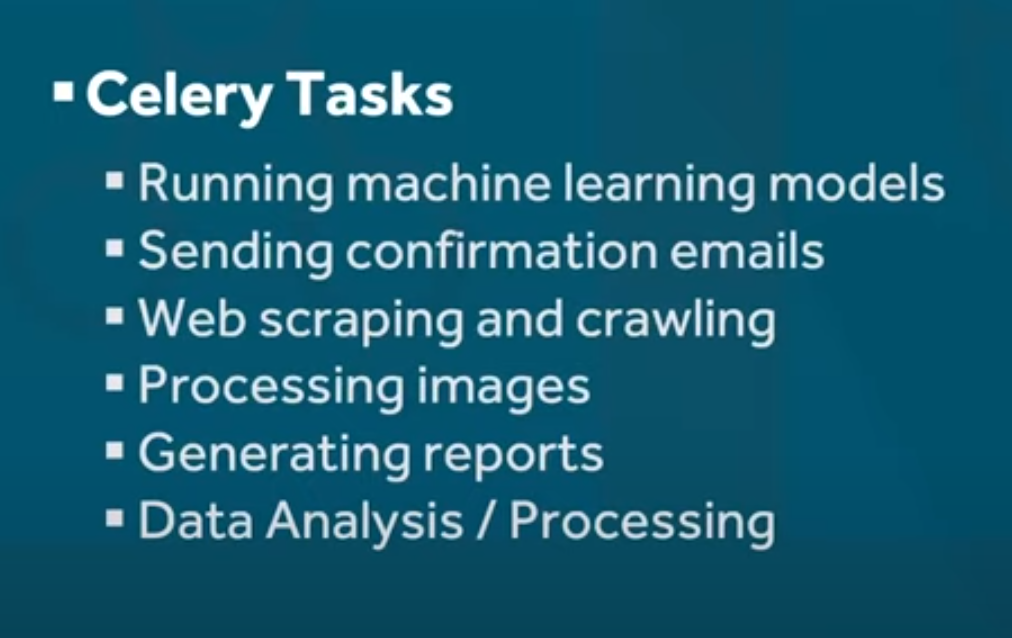
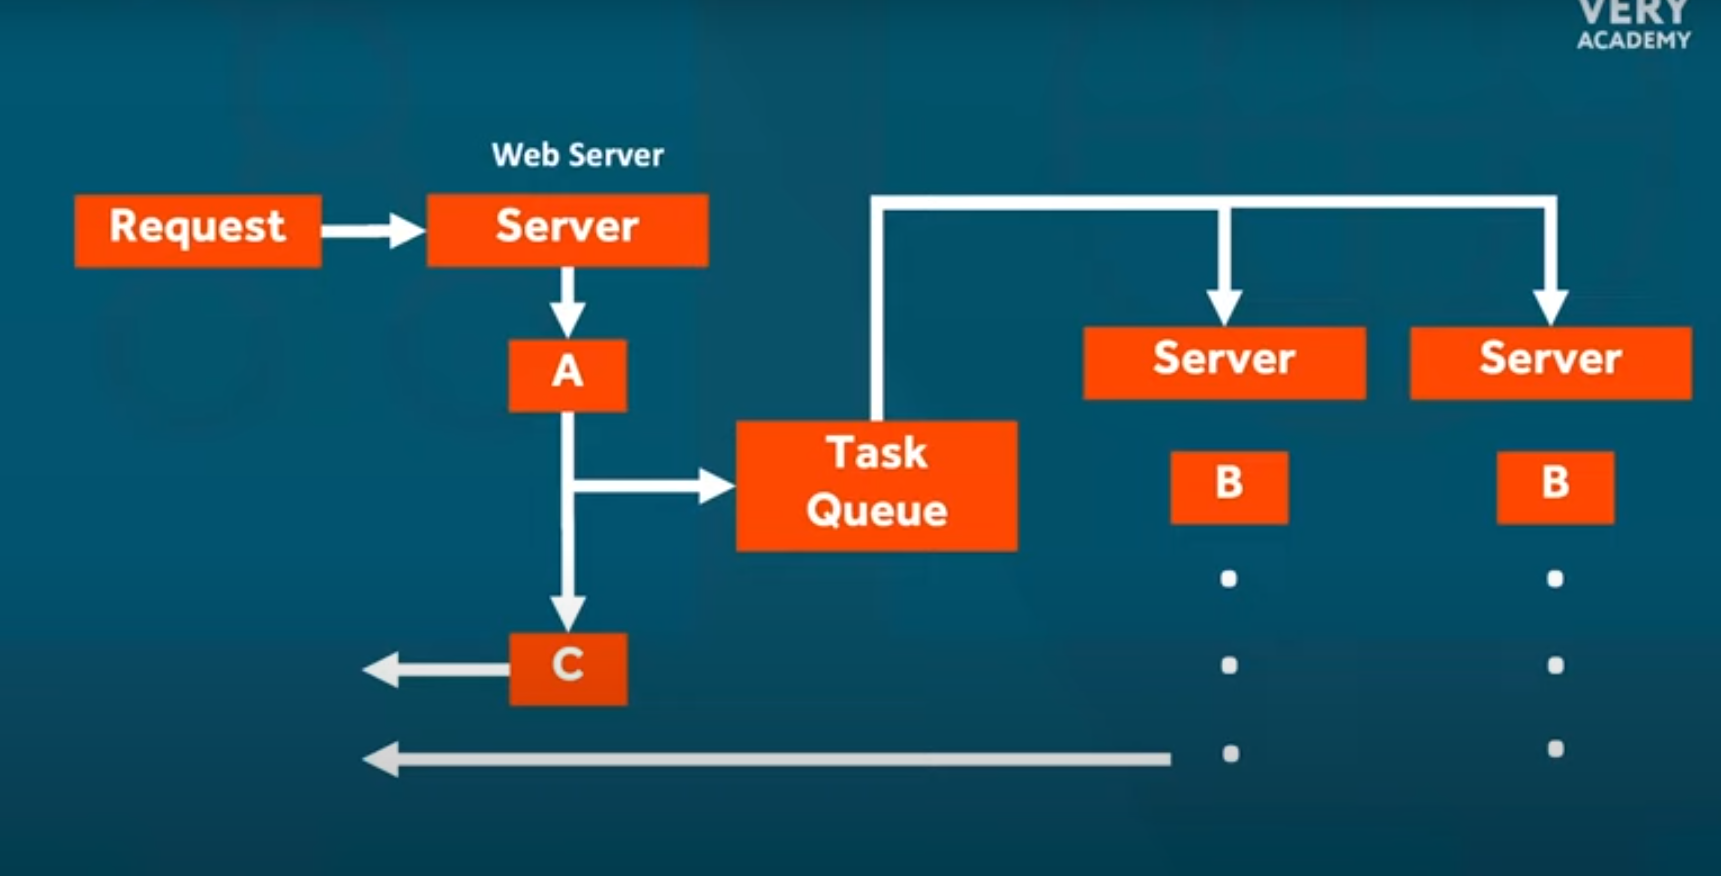
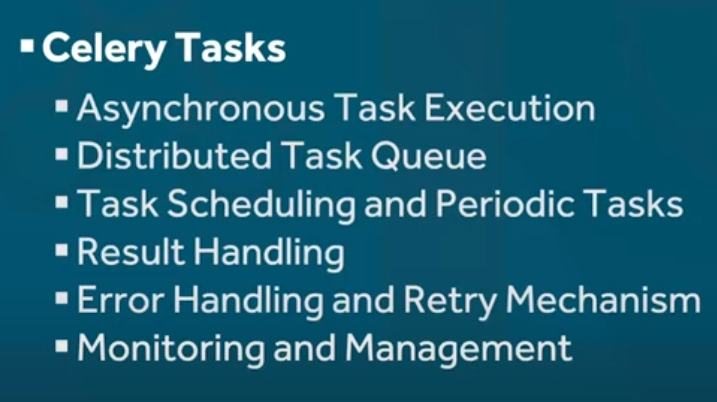
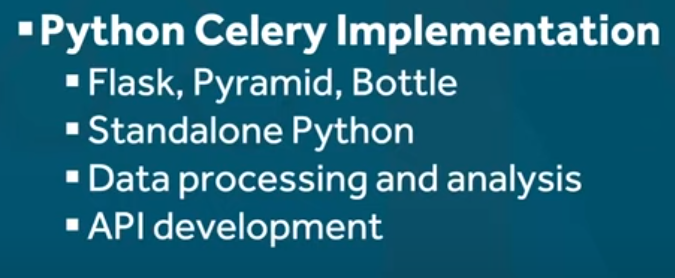
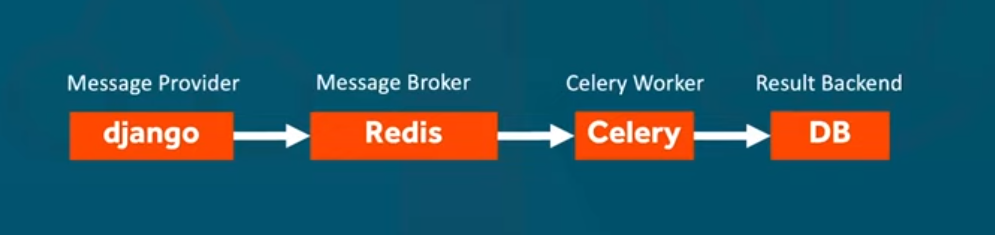

# Error Handling
In post models I encountred this Erorr "ValueError: The QuerySet value for an exact lookup must be limited to one result using slicing."
<br><br>
The error message you’re encountering is a ValueError that arises when Django tries to use an exact lookup on a QuerySet that contains multiple results. This error is triggered by Django to prevent unintended behavior or ambiguity in the code.
<br>
To resolve this error, you should ensure that the QuerySet you’re using is limited to one result using slicing. Here’s how you can do it:
<br><br>
1.If you are expecting only one object and are certain that your query will return only one, you can use get() instead of filter().
<br>
```python
# Instead of...
my_object = MyModel.objects.filter(field='value')

# Use...
my_object = MyModel.objects.get(field='value')
```

<br><br>
2.If you need to get a single object out of multiple results, you can use first() or last() depending on your requirement. These methods return the first or last item in the QuerySet.
<br>
```python
# Instead of...
my_objects = MyModel.objects.filter(field='value')

# Use...
my_object = my_objects.first()  # or my_objects.last()
```
<br><br>
3.If you need to limit your QuerySet to a single result and want to raise an exception if there are multiple or no results, you can use get_object_or_404(). This helper function from Django combines a get() call with a 404 error if the object is not found.

```python

from django.shortcuts import get_object_or_404

# Instead of...
my_object = MyModel.objects.filter(field='value')

# Use...
my_object = get_object_or_404(MyModel, field='value')
```

# when we use save method in django models
<br><br>
When you use the save() method in Django models, it saves the current instance of the model to the database. By default, Django provides this method for all model classes.

Here’s an example of how to use the save() method in Django:
<br>
```python
from django.db import models

class MyModel(models.Model):
    field1 = models.CharField(max_length=100)
    field2 = models.IntegerField()

# Create a new instance of the model
my_instance = MyModel(field1='example', field2=42)

# Save the instance to the database
my_instance.save()
```
<br><br>

In the example above, my_instance.save() will save the current instance of MyModel with the provided values for field1 and field2 to the database.

The save() method also provides a way to override the default behavior. You can override the save() method in your model to implement custom logic that should be executed when saving an instance.

Here’s an example of overriding the save() method:
<br>
```python
from django.db import models

class MyModel(models.Model):
    field1 = models.CharField(max_length=100)
    field2 = models.IntegerField()

    def save(self, *args, **kwargs):
        # Custom logic before saving
        # ...

        super().save(*args, **kwargs)  # Call the original save() method

        # Custom logic after saving
        # ...
```
<br><br>
In the example above, the save() method of MyModel has been overridden. The custom logic can be implemented before and/or after the original save() method is called. Make sure to keep the original save() method intact by calling super().save(*args, **kwargs).

# what is slugify in django
<br><br>
In Django, slugify is a process that converts a string into a URL-friendly version, primarily for creating cleaner and more meaningful URLs. The slug field (models.SlugField) is used to store this URL-friendly version of a text-based field, such as a title. It plays a crucial role in improving the structure and readability of URLs in web applications, enhancing user experience and search engine optimization (SEO).

# Stream model in post exp
<br><br>
I'd be glad to explain the `Stream` model in Django and address the functionalities of the `following` and `user` columns:

**Model Breakdown:**

- **Class Name:** `Stream`
  - This suggests the model is designed to represent a stream of content, possibly for social media-like functionalities.

- **Columns:**
  - `following` (ForeignKey to `User`, on_delete=models.CASCADE, null=True, related_name='stream_following'):
    - This column establishes a relationship between a user and another user they're following.
    - `ForeignKey`: It creates a link to the `User` model, indicating a single `Stream` instance belongs to one `User`.
    - `on_delete=models.CASCADE`: If a user is deleted, any associated `Stream` objects (their followers' streams) will also be deleted.
    - `null=True`: Allows the possibility of a `Stream` object not having a `following` value (might be used for system-generated or non-user-specific streams).
    - `related_name='stream_following'`: Provides a convenient way to access a user's `Stream` objects that represent who they're following (using reverse relationships).

  - `user` (ForeignKey to `User`, on_delete=models.CASCADE):
    - This column points to the user whose stream this particular `Stream` instance belongs to.
    - Again, `ForeignKey` and `on_delete=models.CASCADE` work similarly as with the `following` column.
    - However, in this context, `user` refers to the owner of the stream, not the users they're following.

  - `post` (ForeignKey to `Post`, on_delete=models.CASCADE, null=True):
    - This column links a `Stream` object to a specific `Post` model instance.
    - The `null=True` property allows for streams that might not be directly tied to a specific post (e.g., system notifications).

  - `date` (DateTimeField):
    - This column stores the date and time associated with the stream entry, likely reflecting when the post was created or when the stream was generated.

**Functionality of `following` and `user`:**

1. **Creating a Stream:**
   - The model likely has a mechanism to create `Stream` objects, possibly associated with a user creating a post, a scheduled system notification, or other actions.

2. **Populating the Stream:**
   - The provided `add_post` signal handler (a function triggered when a `Post` instance is saved) demonstrates how streams can be automatically generated.
   - When a post is saved (presumably by a user), the signal handler:
     - Retrieves the post (`post`) and the user who created it (`user`).
     - Finds all followers (`followers`) of `user` using the `Follow` model (assuming a separate model for follow relationships).
     - For each follower, a new `Stream` object is created, associating it with the following information:
       - `post`: The post that was created.
       - `user`: The follower of `user` (the one who should see the post in their stream).
       - `date`: The `posted` date/time retrieved from the `Post` instance (assuming a `posted` field exists).
       - `following`: The user who created the post (the one being followed).
     - Each newly created `Stream` object is saved to the database.

**In essence:**

- The `following` column enables a user to build a following list, reflecting the users whose posts they want to see in their stream.
- The `user` column identifies the owner of the specific stream, indicating whose feed (stream of posts) it represents.

**Additional Considerations:**

- The model might need additional logic for handling different types of streams (e.g., system-generated notifications, direct messages).
- You might have other models like `Follow` as suggested by the code snippet, or a different approach for representing follow relationships.

I hope this comprehensive explanation sheds light on the `Stream` model and the roles of the `following` and `user` columns!

# what is meaning of Null in database
<br><br>
what is meaning of null column in database
A null column in a database is a column that allows the storage of empty or undefined values. This means that you can insert or update data into the table without providing a value for the null column.

To fetch the null values from a table, you can use the keywords “NULL” or “NOT NULL.” However, you cannot select null data using comparison operators like “=”, “!=”, “>”, “<”. Instead, you need to use the special clause “IS NULL” or “IS NOT NULL” to check for null values.

When inserting data into a table, if you don’t have a value for a specific field, you can insert “NULL” into that column. This is particularly useful when you want to avoid adding garbage values to fields with missing data.

Here’s a simple example using SQLite to demonstrate working with null columns:

```sql
-- Create a table with a nullable column
CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    phone_number TEXT
);

-- Insert data into the table, including a null value
INSERT INTO employees (id, name, phone_number) VALUES (1, 'John Doe', NULL);
INSERT INTO employees (id, name, phone_number) VALUES (2, 'Jane Smith', '555-1234');

-- Retrieve employees with a null phone_number
SELECT * FROM employees WHERE phone_number IS NULL;
```

<br>
In this example, the “phone_number” column is nullable, meaning it can store empty or undefined values. We insert a row with a null value for the phone_number, and then retrieve all employees with a null phone_number using the “IS NULL” operator.

Remember, null values are not equivalent to zero or empty strings, and they should be treated as distinct values in your queries and data manipulation operations.

# get_queryset and get_context_data in ListView 
<br>
<br>
In Django's class-based views, particularly those inheriting from `ListView`, `get_context_data` and `get_queryset` serve distinct purposes:

**`get_queryset`:**

- **Function:** Responsible for determining the list of objects that will be displayed in the view.
- **When called:** Invoked automatically by Django before rendering the view.
- **Returns:** A queryset containing the objects to be displayed.
- **Customization:** You can override this method to filter, order, or manipulate the default queryset based on your specific requirements.

**`get_context_data`:**

- **Function:** Used to add additional data to the context dictionary that will be passed to the template for rendering.
- **When called:** You can call it explicitly within your view to add context data beyond the default provided by `ListView`.
- **Returns:** A modified context dictionary containing both the default data and your additional information.
- **Customization:** Use this method to include any data you need in the template that's not directly related to the list of objects being displayed.

**Key Differences:**

| Feature        | `get_queryset`                                     | `get_context_data`                                                |
|----------------|-------------------------------------------------|-------------------------------------------------------------------|
| Purpose        | Determines the list of objects to display         | Provides additional data for the template                         |
| When called     | Automatically by Django before rendering           | Explicitly called within your view code                           |
| Returns        | A queryset containing objects to display           | A modified context dictionary                                      |
| Customization   | Filter, order, or manipulate the default queryset | Include any additional data needed in the template                  |

**Example:**

```python
from django.views.generic import ListView

class PostListView(ListView):
    model = Post
    template_name = 'post_list.html'

    def get_queryset(self):
        # Filter posts based on some criteria (e.g., category)
        return Post.objects.filter(category=self.kwargs['category'])

    def get_context_data(self, **kwargs):
        context = super().get_context_data(**kwargs)
        context['popular_posts'] = Post.objects.filter(views__gt=100).order_by('-views')[:5]
        return context
```

In this example:

- `get_queryset` filters posts based on the category specified in the URL keyword arguments.
- `get_context_data` retrieves the top 5 most viewed posts (excluding the default data provided by `ListView`) and adds them to the context dictionary under the key `'popular_posts'`.

**In essence:**

- `get_queryset` focuses on the core data displayed in the view (the list of objects).
- `get_context_data` enriches the template with additional information beyond the main list.


<a href="https://stackoverflow.com/questions/63211138/django-cbvs-get-queryset-and-get-context-data">Explain more</a>

# Django ModelForm: What is save(commit=False) used for?
<br><br>

Why would I ever use save(commit=False) instead of just creating a form object from the ModelForm subclass and running is_valid() to validate both the form and model?

In other words, what is save(commit=False) for?

Can you provide hypothetical situations where this might be useful?
<br><br>
That's useful when you get most of your model data from a form, but you need to populate some null=False fields with non-form data.

Saving with commit=False gets you a model object, then you can add your extra data and save it.

<a href="https://stackoverflow.com/a/575133/931277">This is a good example of that situation.</a>

Here's the <a href="https://docs.djangoproject.com/en/4.0/topics/forms/modelforms/#the-save-method">documentation on the save method</a>. Note that if your form includes many-to-many fields, you'll also want to call form.save_m2m() after saving the model instance.